Question 1

Detection of fake commodity: There are a total of 100,000 pairs of shoes of a well-known brand on an e-commerce platform.
The official guide price of these shoes is $48 ~ $68. Now we randomly sample 1,000 pairs from them for inspection, where 100 pairs of shoes with quality or counterfeit problems are found. The price distribution of the 100 pairs of counterfeit shoes is mainly concentrated on two price points, with 60 pairs for $30 and 40 pairs for $50. Please give the price point at which you can most likely buy qualified shoes at the lowest price. Prerequisite judgments can be made based on personal understanding of real life.


MY APPROACH

My known facts
(1) MINIMUM probability of 30 and 50 shoes dollar shoes in the inventory
(2) Probability of counterfeit goods
(3) Probability of prices of counterfeit goods

First step: Use (1) and (2) to estimate (A) the likely probability distribution of prices, and range of prices 

Second step: Use (A) and (3) as inputs for Bayes' Theorem formula to calculate the posterior probability that a shoe is real GIVEN the estimated lowest price point. If it is a likely probability, we will submit that price point as the answer

# Assess Likely Distribution of the Data

I will draw 1000 samples from different types of distributions, scale them accordingly to the possible price ranges (30-50 or 30-68) and assess whether they can meet the constraints of at least 6 percent for 30 dollar shoes, and 4 percent for 50 dollar shoes

In [113]:
import numpy as np

# Needed for plotting
import matplotlib.colors
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Needed for generating classification, regression and clustering datasets
import sklearn.datasets as dt

# Needed for generating data from an existing dataset
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

In [114]:
# Define the seed so that results can be reproduced
seed = 11
rand_state = 11

# Define the color maps for plots
color_map = plt.cm.get_cmap('RdYlBu')
color_map_discrete = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","cyan","magenta","blue"])

In [115]:
rand = np.random.RandomState(seed)    

dist_list = ['uniform','normal','exponential','lognormal','chisquare','beta']
param_list = ['-1,1','0,1','1','0,1','2','0.5,0.9']
colors_list = ['green','blue','yellow','cyan','magenta','pink']

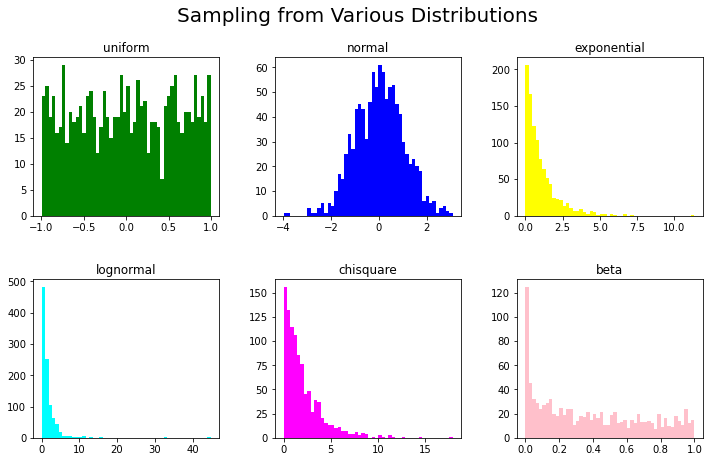

In [123]:
fig,ax = plt.subplots(nrows=2, ncols=3,figsize=(12,7))
plt_ind_list = np.arange(6)+231

for dist, plt_ind, param, colors in zip(dist_list, plt_ind_list, param_list, colors_list):
    x = eval('rand.'+dist+'('+param+',1000)') 
    
    globals()["distribution_" + dist] = x
    
    plt.subplot(plt_ind)
    plt.hist(x,bins=50,color=colors)
    plt.title(dist)

fig.subplots_adjust(hspace=0.4,wspace=.3) 
plt.suptitle('Sampling from Various Distributions',fontsize=20)
plt.show()

In [395]:
from sklearn.preprocessing import MinMaxScaler
def find_perc_of_known_shoes(dist, lower_bound, upper_bound):
    scaler = MinMaxScaler((lower_bound, upper_bound))
    dist = pd.DataFrame(dist)
    scaler.fit(dist)
    dist = scaler.transform(dist)
    dist = pd.DataFrame(dist, columns = ['values'])
    dist['rounded_values'] = dist['values'].apply(lambda x:round(x))
    perc_30 = dist[dist['rounded_values'] == 30]
    print("% of $30 shoes is " + str(len(perc_30)/len(dist)) )
    
    perc_50 = dist[dist['rounded_values'] == 50]
    print("% of $50 shoes is " + str(len(perc_50)/len(dist)) )

In [399]:
# Note: I set the min and max value boundary 1 value wider than the investigated price range to account for rounding issues

for dist in dist_list: 
    
    print("results for price range 30-50 " + str(dist))
    find_perc_of_known_shoes(globals()["distribution_" + dist], 29, 51)
    
    print("results for price range 30-68 " + str(dist))
    find_perc_of_known_shoes(globals()["distribution_" + dist], 29, 69)


results for price range 30-50 uniform
% of $30 shoes is 0.049
% of $50 shoes is 0.051
results for price range 30-68 uniform
% of $30 shoes is 0.028
% of $50 shoes is 0.021
results for price range 30-50 normal
% of $30 shoes is 0.001
% of $50 shoes is 0.007
results for price range 30-68 normal
% of $30 shoes is 0.001
% of $50 shoes is 0.064
results for price range 30-50 exponential
% of $30 shoes is 0.309
% of $50 shoes is 0.0
results for price range 30-68 exponential
% of $30 shoes is 0.215
% of $50 shoes is 0.001
results for price range 30-50 lognormal
% of $30 shoes is 0.33
% of $50 shoes is 0.0
results for price range 30-68 lognormal
% of $30 shoes is 0.4
% of $50 shoes is 0.0
results for price range 30-50 chisquare
% of $30 shoes is 0.277
% of $50 shoes is 0.0
results for price range 30-68 chisquare
% of $30 shoes is 0.179
% of $50 shoes is 0.001
results for price range 30-50 beta
% of $30 shoes is 0.084
% of $50 shoes is 0.037
results for price range 30-68 beta
% of $30 shoes is 0

As we see for any of the standard distributions, under both price ranges, we cannot meet the minimum occurrence constraints of the 30 dollar and 50 dollar shoe. 

We will have to manually adjust parameters for selected distributions to determine which is the most likely distribution

In [414]:
for i in np.arange(0.1, 1, 0.1):
    dist = 'beta'
    param = '0.5, 0.9'
    
    param = str(i) + ',' + '0.9'
    x = eval('rand.'+dist+'('+param+',1000)')
    scaler = MinMaxScaler((29, 51))
    dist = pd.DataFrame(x)
    scaler.fit(dist)
    dist = scaler.transform(dist)
    dist = pd.DataFrame(dist, columns = ['values'])
    dist['rounded_values'] = dist['values'].apply(lambda x:round(x))
    perc_30 = len(dist[dist['rounded_values'] == 30])/len(dist)
    #print("% of $30 shoes is " + str(len(perc_30)/len(dist)) )

    perc_50 = len(dist[dist['rounded_values'] == 50])/len(dist)
    
    #print("% of $50 shoes is " + str(len(perc_50)/len(dist)) 
          
    if (perc_30 >= 0.06) and  (perc_50 >=0.04):
            print("at alpha of " + str(i))
            print("% of $30 shoes is " + str(perc_30) )
            print("% of $50 shoes is " + str(perc_50) )

at alpha of 0.7000000000000001
% of $30 shoes is 0.062
% of $50 shoes is 0.047


(array([150.,  78.,  61.,  51.,  39.,  39.,  40.,  46.,  34.,  44.,  70.,
         31.,  40.,  36.,  32.,  42.,  33.,  42.,  36.,  56.]),
 array([29. , 30.1, 31.2, 32.3, 33.4, 34.5, 35.6, 36.7, 37.8, 38.9, 40. ,
        41.1, 42.2, 43.3, 44.4, 45.5, 46.6, 47.7, 48.8, 49.9, 51. ]),
 <BarContainer object of 20 artists>)

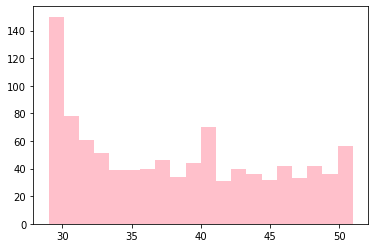

In [426]:
dist = 'beta'
param = '0.7, 0.9'
x = eval('rand.'+dist+'('+param+',1000)')
scaler = MinMaxScaler((29, 51))
dist = pd.DataFrame(x)
scaler.fit(dist)
dist = scaler.transform(dist)
dist = pd.DataFrame(dist, columns = ['values'])
dist['rounded_values'] = dist['values'].apply(lambda x:round(x))
x = dist['rounded_values']
plt.hist(x,bins=20,color=colors)


In [427]:
x.value_counts()

30    85
31    78
29    65
32    61
33    51
37    46
39    44
48    42
46    42
50    42
36    40
43    40
35    39
40    39
34    39
49    36
44    36
38    34
47    33
45    32
41    31
42    31
51    14
Name: rounded_values, dtype: int64

We now have the probability distribution of prices in the range of 29-51 (expanded the original window by 1 to account for rounding). Given that the official price guide is 48-68, it's likelier that the next lowest price is > 30. The next lowest price after 30 is 31, which has the probability of 78/1000 = 0.078

# Apply Bayes' Formula to discover the probability that the next lowest price point is real

In [430]:
# We want to find prob of lowest price (31), given that it is real.
# We state all the known and estimated probabilities to be factored into Bayes' formula
prob_real = 0.9
prob_counterfeit = 0.1
prob_30 = 0.04
prob_50 = 0.06
prob_30_given_counterfeit = 0.6
prob_50_given_counterfeit = 0.4
prob_31 = 0.078

In [431]:
# applying Bayes' Theorem

prob_real_given_lowest_price = 0 

prob_real_given_lowest_price =  (((prob_real*prob_31)/prob_real) * prob_real)/prob_31

print(prob_real_given_lowest_price)

0.9


The probability of a real good at the second lowest price of 31 dollars within the price range is 0.9. As the probability of counterfeit is relatively low here, we should buy goods at 31 dollars. 